In [95]:
import pandas as pd
import numpy as np
import os
import os.path
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf

In [96]:
dataTrain = Path("C:/Users/tlsrl/BigData_pro/training_set")
filepath = list(dataTrain.glob(r"**/*.jpg"))
print(filepath[10])
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

C:\Users\tlsrl\BigData_pro\training_set\Agreeableness\IMG_20200215_163359.jpg


In [97]:
filepath = pd.Series(filepath, name='Filepath').astype(str)
print(labels[60])
labels = pd.Series(labels,name="Labels")

ListA = []
for i in filepath:
    image = cv2.imread(i,0)
    ListA.append(np.array(image,"uint8"))
    
ListA = pd.Series(ListA,name="Array")
MainData = pd.concat([ListA,labels],axis=1)
data = MainData.copy() # to protect main data
print(data["Labels"].value_counts())

Extraversion
Openness             76
Neuroticism          36
Agreeableness        30
Conscientiousness    27
Extraversion          8
Name: Labels, dtype: int64


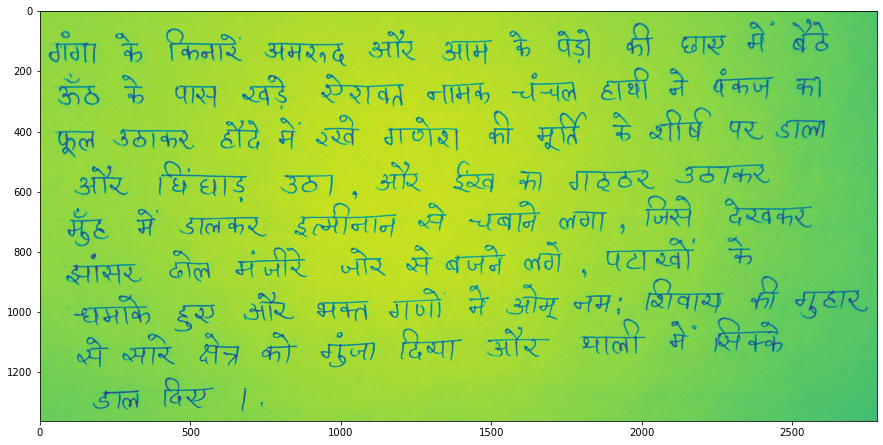

In [98]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][10])

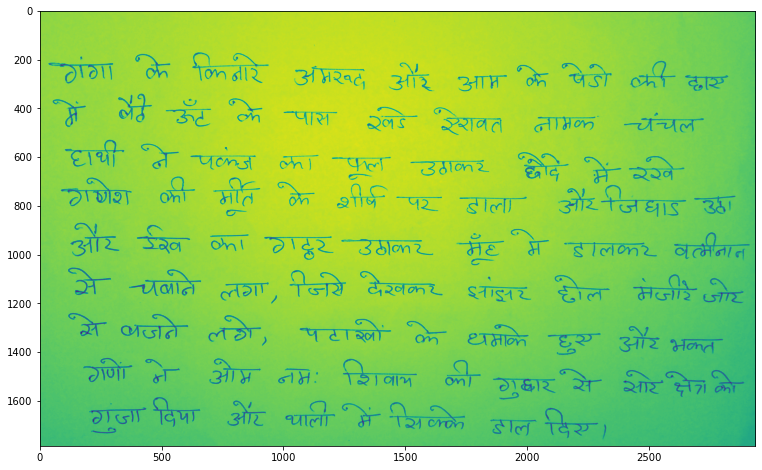

In [99]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][5])

In [100]:
print(data.head())

                                               Array         Labels
0  [[255, 238, 255, 255, 253, 245, 255, 255, 253,...  Agreeableness
1  [[255, 248, 255, 250, 255, 249, 255, 252, 255,...  Agreeableness
2  [[142, 144, 144, 139, 136, 138, 140, 139, 140,...  Agreeableness
3  [[168, 164, 166, 169, 170, 172, 173, 170, 173,...  Agreeableness
4  [[132, 132, 132, 130, 136, 132, 130, 132, 136,...  Agreeableness


In [102]:
SecondData = pd.concat([filepath,labels],axis=1) # CREATING NEW DATA TO PROTECT MAIN DATA
print(SecondData.head())

,Filepath,Labels
0,C:\Users\tlsrl\BigData_pro\training_set\Agreea...,Agreeableness
1,C:\Users\tlsrl\BigData_pro\training_set\Agreea...,Agreeableness
2,C:\Users\tlsrl\BigData_pro\training_set\Agreea...,Agreeableness
3,C:\Users\tlsrl\BigData_pro\training_set\Agreea...,Agreeableness
4,C:\Users\tlsrl\BigData_pro\training_set\Agreea...,Agreeableness
...,...,...
172,C:\Users\tlsrl\BigData_pro\training_set\Openne...,Openness
173,C:\Users\tlsrl\BigData_pro\training_set\Openne...,Openness
174,C:\Users\tlsrl\BigData_pro\training_set\Openne...,Openness
175,C:\Users\tlsrl\BigData_pro\training_set\Openne...,Openness


In [88]:
x = SecondData["Filepath"]
y = SecondData["Labels"]
encode = LabelEncoder()
x = encode.fit_transform(x)
print(x)
y = encode.fit_transform(y)
print(y)
print(x.shape)
print(y.shape)

[ 24  25   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20  21  22  23  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [45]:
x = np.asarray(x).astype("float32")
x = x.reshape(177,1,1)
y = np.asarray(y).astype("float32")
y = y.reshape(177,1,1)
print(len(x))
print(len(y))

177
177


In [46]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.1,random_state=42)
print(xTrain.shape) # CHECKING SHAPE
print(xTest.shape) # CHECKING SHAPE
print(yTrain.shape) # CHECKING SHAPE
print(yTest.shape) # CHECKING SHAPE

(159, 1, 1)
(18, 1, 1)
(159, 1, 1)
(18, 1, 1)


In [47]:
ANNmodel = tf.keras.models.Sequential([
  # inputs 
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(5,activation="softmax")
])

lossfunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

ANNmodel.compile(optimizer='rmsprop', loss=lossfunc, metrics=['accuracy'])

Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [48]:
MainModel = ANNmodel.fit(xTrain, yTrain,epochs=30, batch_size=5 ,callbacks=Callback ,validation_data=(xTest,yTest))

Epoch 1/30


C:\Users\tlsrl\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


32/32 [==============================] - 0s 4ms/step - loss: 1.4642 - accuracy: 0.4025 - val_loss: 1.2862 - val_accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 1.2826 - accuracy: 0.4214 - val_loss: 1.1614 - val_accuracy: 0.5000
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 1.2238 - accuracy: 0.4214 - val_loss: 1.0744 - val_accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 1.1566 - accuracy: 0.4214 - val_loss: 0.9965 - val_accuracy: 0.5000
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 1.1118 - accuracy: 0.4843 - val_loss: 0.9451 - val_accuracy: 0.6667
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 1.0490 - accuracy: 0.5660 - val_loss: 0.9098 - val_accuracy: 0.7222
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 1.0011 - accuracy: 0.5849 - val_loss: 0.8506 - val_accuracy: 0.7222
Epoch 8/30
32/32 [=============

In [49]:
result_Model = ANNmodel.evaluate(xTest,yTest)

1/1 [==============================] - 0s 12ms/step - loss: 0.3668 - accuracy: 0.9444


In [50]:
print(ANNmodel.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 1, 1)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [54]:
dataTest = Path("C:/Users/tlsrl/BigData_pro/test_set")
filepath_test = list(dataTest.glob(r"**/*.jpg"))
print(filepath_test[10])
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath_test))

C:\Users\tlsrl\BigData_pro\test_set\Conscientiousness\IMG_20200215_174939.jpg


In [56]:
filepath_test = pd.Series(filepath_test, name='Filepath_test').astype(str)
print(labels[0])
labels_test = pd.Series(labels_test,name="Labels_test")

List_test = []
for i in filepath_test:
    image = cv2.imread(i,0)
    List_test.append(np.array(image,"uint8"))
    
List_test = pd.Series(List_test,name="Array")
TestData = pd.concat([List_test,labels_test],axis=1)
data_test = TestData.copy() # to protect main data
print(data_test["Labels_test"].value_counts())

Agreeableness
Openness             18
Neuroticism           8
Agreeableness         8
Conscientiousness     8
Extraversion          2
Name: Labels_test, dtype: int64


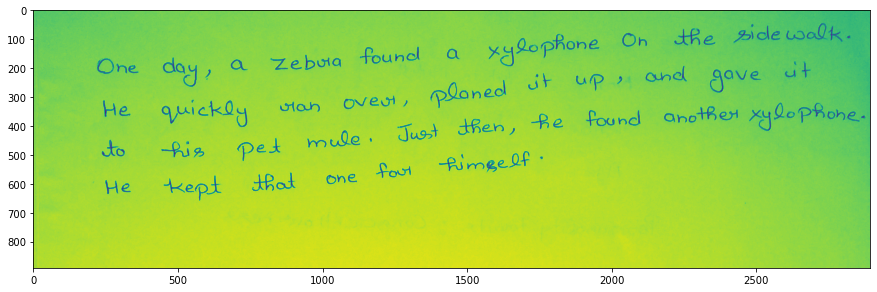

In [57]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data_test["Array"][10])

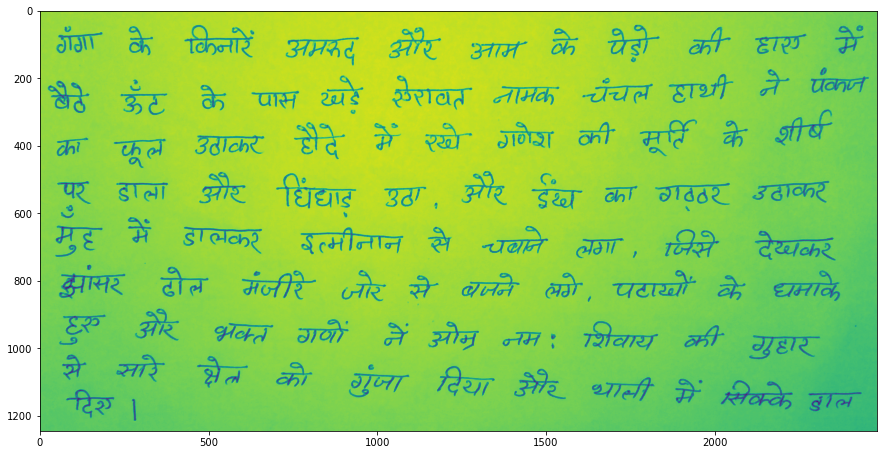

In [58]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data_test["Array"][5])

In [59]:
print(data_test.head())

                                               Array    Labels_test
0  [[147, 145, 144, 145, 139, 140, 145, 146, 146,...  Agreeableness
1  [[177, 177, 179, 177, 176, 177, 177, 177, 177,...  Agreeableness
2  [[148, 148, 150, 148, 149, 150, 150, 151, 152,...  Agreeableness
3  [[180, 181, 180, 181, 182, 181, 181, 181, 181,...  Agreeableness
4  [[155, 155, 155, 156, 155, 155, 155, 154, 154,...  Agreeableness


In [86]:
SecondData_test = pd.concat([filepath_test,labels_test],axis=1) # CREATING NEW DATA TO PROTECT MAIN DATA
print(SecondData_test.head())  # GENERAL INFO

x_test = SecondData_test["Filepath_test"]
y_test = SecondData_test["Labels_test"]
print(x_test)
print(y_test)
encode = LabelEncoder()
x_test = encode.fit_transform(x_test)
print(x_test)
y_test = encode.fit_transform(y_test)
print(y_test)
print(x_test.shape)
print(y_test.shape)

x_test = np.asarray(x_test).astype("float32")
x_test = x_test.reshape(44,1,1)
y_test = np.asarray(y_test).astype("float32")
y_test = y_test.reshape(44,1,1)
print(len(x_test))
print(len(y_test))


                                       Filepath_test    Labels_test
0  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
1  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
2  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
3  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
4  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
0     C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...
1     C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...
2     C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...
3     C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...
4     C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...
5     C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...
6     C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...
7     C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...
8     C:\Users\tlsrl\BigData_pro\test_set\Conscienti...
9     C:\Users\tlsrl\BigData_pro\test_set\Conscienti...
10    C:\Users\tlsrl\BigData_pro

In [91]:
y_predict = ANNmodel.predict(x_test)
for i in y_predict:
    print(i)
    print(np.argmax(i))
#print(y_test)

[0.56480277 0.32218105 0.05781167 0.04824694 0.00695761]
0
[0.5648959  0.3222524  0.0577441  0.04817208 0.00693548]
0
[0.56498903 0.32232368 0.0576766  0.04809731 0.00691343]
0
[0.56508195 0.32239485 0.05760916 0.04802263 0.00689143]
0
[0.56517464 0.322466   0.05754177 0.04794807 0.00686951]
0
[0.56526726 0.322537   0.05747445 0.04787359 0.00684765]
0
[0.5653597  0.322608   0.0574072  0.04779922 0.00682587]
0
[0.56545204 0.32267883 0.05734001 0.04772497 0.00680415]
0
[0.5655442  0.32274964 0.05727287 0.04765082 0.0067825 ]
0
[0.56563616 0.3228204  0.0572058  0.04757676 0.00676091]
0
[0.56561446 0.3230041  0.05714101 0.04750507 0.00673546]
0
[0.56550795 0.32327202 0.05707782 0.04743509 0.00670716]
0
[0.56530297 0.32366392 0.05700341 0.04735953 0.00667021]
0
[0.56497604 0.32416168 0.05694037 0.04729079 0.00663109]
0
[0.564572   0.32471514 0.05688563 0.04723532 0.00659192]
0
[0.5636676  0.32561025 0.05690913 0.04725324 0.00655979]
0
[0.5618369  0.32723647 0.05701654 0.04737254 0.00653755]

                                       Filepath_test    Labels_test
0  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
1  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
2  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
3  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
4  C:\Users\tlsrl\BigData_pro\test_set\Agreeablen...  Agreeableness
